# Test Notebook for nisarcryodb applied to Solid Earth
---

This note book is used to develop, test, and document the  `nisarcryodb` class, which is used to query the NISAR cal/val db for GPS data from cryosphere validation sites.


In [1]:
%load_ext autoreload
%autoreload 2
import nisarcryodb
from psycopg2 import sql
import matplotlib.pyplot as plt
import numpy as np

## Initialize nisarcryodb Object

This step initializes the connection to the nisar cal/val data base. It requires a cal/val database user name and passwd.

In [2]:
myConnection = nisarcryodb.nisarcryodb()

User name:  irj
Password:  ········


## List Schema

List all of the schema in the database. 

In [3]:
schemas = myConnection.listSchema(quiet=False)

crop_area
pg_catalog
information_schema
soil_moisture
inundation
disturbance
seaice
biomass_save
biomass
pg_temp_8
pg_toast_temp_8
nisar
permafrost
sites
tiger
tiger_data
topology
public
solidearth
landice
pg_temp_16
pg_toast_temp_16
corner_reflectors


## List Table Names for Schema

List the names of the table under the solidearth schema.

In [4]:
myConnection.listSchemaTableNames('solidearth');

interferogram
validation_run
l3_product
validation_run_intf
validation_run_station
test_site_table
gps_version
site
gps_measurement
gps_station


## List Column Names for Table

List the column names for a table (e.g., gps_station) and schema (e.g., landice).

In [5]:
stationColumns = myConnection.listTableColumns('solidearth', 'gps_station', quiet=False)

station_id, site_id, station_name, reflat, reflon, east_0, north_0, up_0, refframe, refheight, station_geom


This time get the columns for the `gps_measurement` table. Use `returnType=True` to get the data type for each column.

In [6]:
gpsColumns, gpsDataTypes = myConnection.listTableColumns('solidearth', 'gps_measurement', returnType=True)

measurement_id, station_id, gps_version_id, measurement_dt, decimal_year, east, north, up, ant, sig_e, sig_n, sig_u, corr_en, corr_eu, corr_nu
integer, integer, integer, date, double precision, double precision, double precision, double precision, double precision, double precision, double precision, double precision, double precision, double precision, double precision


## List Column Values

Get the `station_name` column values for `solidearth.gps_station` tables 

In [7]:
stationNames = myConnection.getColumn('solidearth', 'gps_station', 'station_name')
stationNames[0:10]

['01NA',
 '02NA',
 '0ABI',
 '0ABN',
 '0ABY',
 '0AKE',
 '0ALE',
 '0ALF',
 '0ALI',
 '0ALM']

Get the `latitude` and `longitude` column values for `solidearth.gps_station` tables 

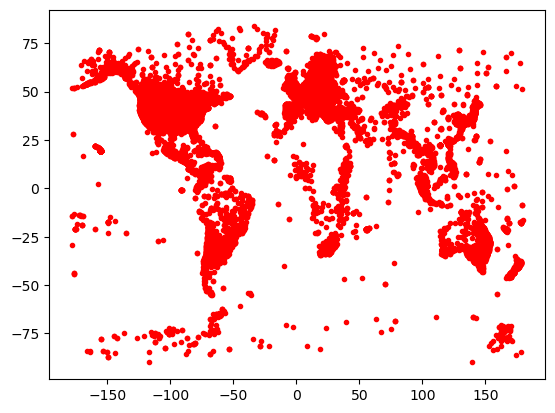

In [8]:
lat = myConnection.getColumn('solidearth', 'gps_station', 'reflat')
lon = myConnection.getColumn('solidearth', 'gps_station', 'reflon')
plt.plot(lon, lat, 'r.')

## Get Station Information Table

Return the table with all of the top-level station data (e.g,, name, id, position, etc).

In [9]:
table = myConnection.getTableListing(schemaName='solidearth', tableName='gps_station')
table

,station_id,site_id,station_name,reflat,reflon,east_0,north_0,up_0,refframe,refheight,station_geom
0,4290,NaN,01NA,-12.478,130.982,-1951.0,-1379987.0,105.0,None,105.409,0101000020E61000008195438B6C5F6040DBF97E6ABCF4...
1,10605,NaN,02NA,-12.356,130.882,-1987.0,-1366458.0,117.0,None,117.652,0101000020E61000004E621058395C604083C0CAA145B6...
2,8173,NaN,0ABI,68.354,18.816,677.0,7585405.0,431.0,None,431.388,0101000020E610000037894160E5D032402DB29DEFA716...
3,9822,NaN,0ABN,65.034,21.333,1548.0,7215094.0,52.0,None,52.762,0101000020E61000006891ED7C3F5535401904560E2D42...
4,9848,NaN,0ABY,58.659,16.180,-1181.0,6504674.0,60.0,None,60.548,0101000020E6100000AE47E17A142E30403108AC1C5A54...
...,...,...,...,...,...,...,...,...,...,...,...
22038,4169,NaN,ZWO2,52.503,6.093,-450.0,5819290.0,65.0,None,65.610,0101000020E6100000AC1C5A643B5F1840AAF1D24D6240...
22039,22005,NaN,ZWOL,52.502,6.096,-301.0,5819243.0,86.0,None,86.657,0101000020E6100000FCA9F1D24D621840C74B37894140...
22040,8624,NaN,ZYRA,52.055,20.420,1391.0,5769437.0,157.0,None,157.400,0101000020E6100000EC51B81E856B3440D7A3703D0A07...
22041,21765,NaN,ZYWE,49.688,19.197,-190.0,5506161.0,405.0,None,405.901,0101000020E6100000DF4F8D976E323340F2D24D6210D8...


## Station Name to ID

Determine the station ID (e.g., 16156) from the station name (e.g., LIZY). This translation is needed to map the station name to station id needed to index the table above.

In [10]:
myConnection.stationNameToID('LIZY', schemaName='solidearth')

16516

## Get GPS Data for Date Range

Return all the data for a designated station for the decimal date range (d1, d2). This next cell could take a minute or more to query the DB. 

In [ ]:
d1 = 2019
d2 = 2024
myData = myConnection.getStationDateRangeData('LIZY', d1, d2, 'solidearth', 'gps_measurement')
myData

In [ ]:
plt.plot(myData['east'], myData['north'], 'r.')

## Rollback a Query Error

This will reset the connection after a query fails with an error. Most of the routines should trap errors and automatically rollback.

In [ ]:
myConnection.connection.rollback()

## Close the connection

Close the connection when finished.

In [ ]:
myConnection.close()